In [13]:
import os
import sys
sys.path.append('../src')
from numpy import *
from numpy import random
from Params import *
from NeutrinoFuncs import *

### Possible variables
ngen = 100000
Nuc = Ar40
fname = 'AtmNu_GranSasso_SolarMin.d'
nc = 20
np = 20
ne = 50

#### Load high energy data
Phi_tot,E_high,cosZ,phi_Az = GetAtmNuFluxes(fname)
Phi_high = squeeze(sum(sum(Phi_tot,0),0))

###### Load low energy FLUKA data
dat1 = loadtxt(nufile_dir+'/atmospheric/FLUKA/AtmNu_mubar.txt',delimiter=',')
dat2 = loadtxt(nufile_dir+'/atmospheric/FLUKA/AtmNu_mu.txt',delimiter=',')
dat3 = loadtxt(nufile_dir+'/atmospheric/FLUKA/AtmNu_e.txt',delimiter=',')
dat4 = loadtxt(nufile_dir+'/atmospheric/FLUKA/AtmNu_ebar.txt',delimiter=',')
E_low = dat1[:,0]
Phi_low = dat1[:,1]+dat2[:,1]+dat3[:,1]+dat4[:,1]

###### Join the two
E_join = append(E_low[0:260],E_high[9:])
Phi_join = append(Phi_low[0:260],Phi_high[9:])

##### Interpolate to create new array
nfine = 1000
E_nu_max = 1.0e4
E_fine = linspace(E_join[0],E_nu_max,nfine)
Phi_fine = interp(E_fine,E_join,Phi_join)

# Generate ngen initial energies and directions
E_gen,phi_nu_gen,costh_nu_gen,E_r_gen =\
    GenerateAtmNuDirections(ngen,E_fine,Phi_fine,E_high,Phi_tot,cosZ,phi_Az,Nuc)

ngen = size(E_gen)

####### Scatter
# Nucleus mass
A = Nuc.MassNumber
m_N_keV = A*m_p_keV

# Scattering angles
th_R = arccos(((E_gen*1000+m_N_keV)/(E_gen*1000))*sqrt(E_r_gen/(2*m_N_keV)))

0.02841
0.05657
0.08448
0.11252
0.14031
0.16816
0.19717
0.22556
0.25379
0.2813
0.30949
0.33751
0.36643
0.39443
0.42266
0.45027
0.47776
0.50605
0.53307
0.5607
0.58886
0.61647
0.64438
0.67326
0.70108
0.72929
0.75756
0.78552
0.81301
0.84066
0.86843
0.89676
0.92467
0.95316
0.98078
1.00913


NameError: name 'th_r' is not defined

81.80592232215845
76.50339194400983
71.5810543581141


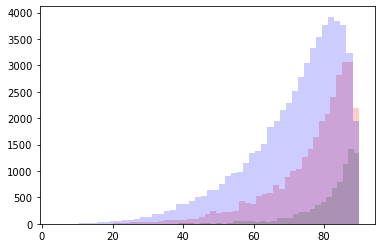

In [18]:
import matplotlib.pyplot as plt

mask1 = (E_r_gen<10.0)&(E_r_gen>2.0)
mask2 = (E_r_gen<50.0)&(E_r_gen>10.0)
mask3 = (E_r_gen>50.0)


plt.hist(th_R[mask1]*180/pi,bins=50,color='g',alpha=0.2)
plt.hist(th_R[mask2]*180/pi,bins=50,color='r',alpha=0.2)
plt.hist(th_R[mask3]*180/pi,bins=50,color='b',alpha=0.2)


print(mean(th_R[mask1]*180/pi))
print(mean(th_R[mask2]*180/pi))
print(mean(th_R[mask3]*180/pi))

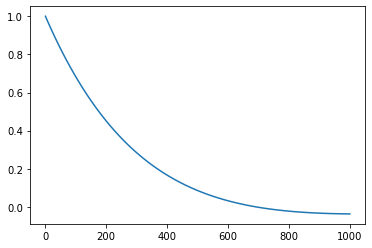

In [26]:
E_r = linspace(0.0,1000.0,100)
plt.plot(E_r,LabFuncs.FormFactorHelm(E_r,40.0))